### Loading packages

In [1]:
from ultralytics import YOLO, RTDETR  
from PIL import Image
import matplotlib.pyplot as plt
import time
import cv2
import numpy as np

# YOLO model

### Loading the best YOLO model and running inference on selected image


image 1/1 c:\Users\magma\OneDrive\Msc Human Centered Artificial Intelligence\8. Semester\Deep Learning\Best models\test_image1.png: 384x640 1 person, 2 cars, 4 traffic lights, 130.6ms
Speed: 3.0ms preprocess, 130.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


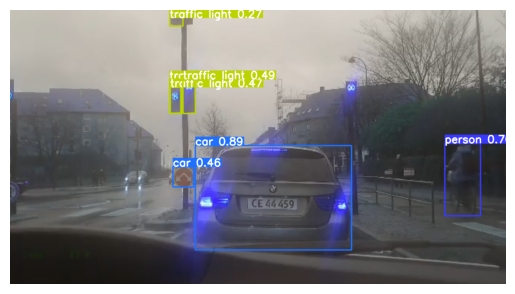

In [33]:
# Load the YOLO model
model_path = "best_yolo.pt"
model_yolo = YOLO(model_path)

# Process an image
image_path = "test_image1.png"
results = model_yolo.predict(image_path) 

# Plot result
for r in results:
    im_array = r.plot()
    plt.imshow(im_array)
    plt.axis('off')  # To turn off the axis
    plt.show()


### Processing a video with YOLO model and calculating FPS

In [34]:
# Process a video
video_path = "bilvideo10.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0

start_time = time.time()

while cap.isOpened():
    success, frame = cap.read()

    if success:
        frame_count +=1
        results = model_yolo(frame, stream = True)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break
elapsed_time = time.time() - start_time
print("FPS = " + str(frame_count / elapsed_time))

FPS = 64.2877725364884


### Illustration of bounding boxes on video

In [12]:
while cap.isOpened():
    success, frame = cap.read()

    if not success:
        break

    # Process the frame 
    results = model_yolo.predict(frame)  

    for r in results:
        im_array = r.plot() 
        frame_with_predictions = cv2.cvtColor(np.array(im_array), cv2.COLOR_RGB2BGR)  # Convert to OpenCV format

    cv2.imshow("Frame", frame_with_predictions)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()



0: 384x640 4 cars, 142.6ms
Speed: 2.5ms preprocess, 142.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 157.6ms
Speed: 3.5ms preprocess, 157.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 159.6ms
Speed: 3.0ms preprocess, 159.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 175.2ms
Speed: 4.5ms preprocess, 175.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 166.6ms
Speed: 3.5ms preprocess, 166.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 172.1ms
Speed: 4.0ms preprocess, 172.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 163.1ms
Speed: 3.0ms preprocess, 163.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 153.1ms
Speed: 3.0ms preprocess, 153.1ms inference, 2.0ms postprocess per image at shape (1, 3, 38

# RT-DETR

### Loading the best RT-DETR model and running inference on selected image


image 1/1 C:\Users\magma\OneDrive\Msc Human Centered Artificial Intelligence\8. Semester\Deep Learning\Best models\test_image1.png: 256x256 9 persons, 3 cars, 4 traffic lights, 1 handbag, 498.9ms
Speed: 1.5ms preprocess, 498.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 256)


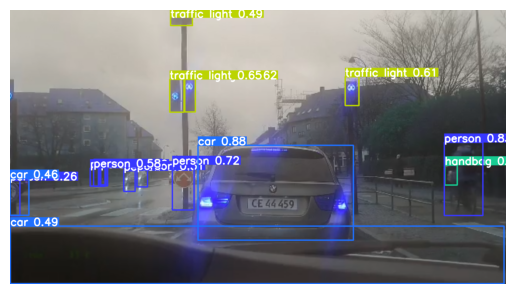

In [28]:
# Load the RT-DETR model
model_path = "best_rtdetr.pt"
model_rtdetr = RTDETR(model_path)

# Process an image
image_path = "test_image1.png"
results = model_rtdetr.predict(image_path) 

# Plot result
for r in results:
    im_array = r.plot()
    plt.imshow(im_array)
    plt.axis('off')  # To turn off the axis
    plt.show()

### Processing a video with RT-DETR and calculating FPS

In [25]:
# Process a video
video_path = "bilvideo10.mp4"
cap = cv2.VideoCapture(video_path)

frame_count = 0

start_time = time.time()

while cap.isOpened():
    success, frame = cap.read()

    if success:
        frame_count +=1
        results = model_rtdetr(frame, stream = True)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break
elapsed_time = time.time() - start_time
print("FPS = " + str(frame_count / elapsed_time))

FPS = 64.26707997826661


### Illustration of bounding boxes on video

In [30]:
while cap.isOpened():
    success, frame = cap.read()

    if not success:
        break

    # Process the frame 
    results = model_rtdetr.predict(frame)  

    for r in results:
        im_array = r.plot() 
        frame_with_predictions = cv2.cvtColor(np.array(im_array), cv2.COLOR_RGB2BGR)  # Convert to OpenCV format

    cv2.imshow("Frame", frame_with_predictions)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


# Selfmade model

In [13]:
import pathlib
import shutil
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
#!pip install selectivesearch
import selectivesearch
import json

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # disabling verbose tf logging

# uncomment the following line if you want to force CPU
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
print(tf.__version__)



2.11.0


In [14]:
CLASSES = 32

input_size = 244

DROPOUT_FACTOR = 0.5


def selective_search(image):
    img_lbl, regions = selectivesearch.selective_search(image, scale=500, sigma=0.9, min_size=10)
    candidates = set()

    for r in regions:
        # excluding same rectangle (with different segments)
        if r['rect'] in candidates:
            continue
        # excluding small regions
        if r['size'] < 1000:
            continue
        # distorted rects
        x, y, w, h = r['rect']
        if w / h > 1.2 or h / w > 1.2:
            continue
        candidates.add(r['rect'])

    return candidates


def build_resnet_block(x, filters, kernel_size=3, stride=1):
    # Shortcut
    shortcut = x

    # First convolution layer
    x = tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

    # Second convolution layer
    x = tf.keras.layers.Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    # Shortcut connection
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = tf.keras.layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = tf.keras.layers.BatchNormalization()(shortcut)

    x = tf.keras.layers.add([x, shortcut])
    x = tf.keras.layers.ReLU()(x)

    return x

def build_feature_extractor(inputs):
    # Initial convolution layer
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same', activation='relu', input_shape=(input_size, input_size, 1))(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # ResNet blocks
    x = build_resnet_block(x, 64)
    x = build_resnet_block(x, 64)
    x = build_resnet_block(x, 128, stride=2)
    x = build_resnet_block(x, 128)
    x = build_resnet_block(x, 256, stride=2)
    x = build_resnet_block(x, 256)
    x = build_resnet_block(x, 512, stride=2)
    x = build_resnet_block(x, 512)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    return x

def build_model_adaptor(inputs):
    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    return x

def build_classifier_head(inputs):
    x = tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01))(inputs)
    return tf.keras.layers.Dense(CLASSES, activation='softmax', name = 'classifier_head')(x)

def build_regressor_head(inputs):
    x = tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01))(inputs)
    x = tf.keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01))(x)
    x = tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.01))(x)
    return tf.keras.layers.Dense(units = '4', name = 'regressor_head')(inputs)

def build_model(inputs):
    
    feature_extractor = build_feature_extractor(inputs)

    model_adaptor = build_model_adaptor(feature_extractor)

    classification_head = build_classifier_head(model_adaptor)

    regressor_head = build_regressor_head(model_adaptor)

    model = tf.keras.Model(inputs = inputs, outputs = [classification_head, regressor_head])

    model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss = {'classifier_head' : 'categorical_crossentropy', 'regressor_head' : 'mse' }, 
              metrics = {'classifier_head' : 'accuracy', 'regressor_head' : 'mse' })

    return model


model = build_model(tf.keras.layers.Input(shape=(input_size, input_size, 1,)))

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 244, 244, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 122, 122, 64  3200        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_20 (BatchN  (None, 122, 122, 64  256        ['conv2d_20[0][0]']              
 ormalization)                  )                                                           

                                                                  're_lu_21[0][0]']               
                                                                                                  
 re_lu_23 (ReLU)                (None, 31, 31, 128)  0           ['add_11[0][0]']                 
                                                                                                  
 conv2d_30 (Conv2D)             (None, 16, 16, 256)  295168      ['re_lu_23[0][0]']               
                                                                                                  
 batch_normalization_30 (BatchN  (None, 16, 16, 256)  1024       ['conv2d_30[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 re_lu_24 (ReLU)                (None, 16, 16, 256)  0           ['batch_normalization_30[0][0]'] 
          

 obalAveragePooling2D)                                                                            
                                                                                                  
 flatten_1 (Flatten)            (None, 512)          0           ['global_average_pooling2d_1[0][0
                                                                 ]']                              
                                                                                                  
 dense_5 (Dense)                (None, 64)           32832       ['flatten_1[0][0]']              
                                                                                                  
 dense_6 (Dense)                (None, 128)          8320        ['dense_5[0][0]']                
                                                                                                  
 classifier_head (Dense)        (None, 32)           4128        ['dense_6[0][0]']                
          

In [15]:
model = tf.keras.models.load_model('object_detection_model10.h5')

1/1 [==============================] - 0s 491ms/step


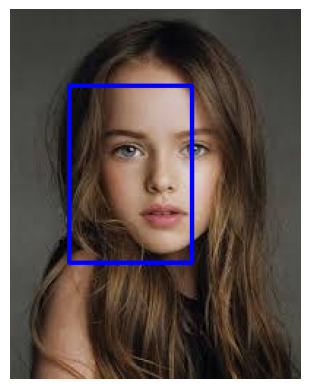

In [16]:

import time

image_path = "trial.jpg"


def format_image(img, box):
    height, width = img.shape 
    max_size = max(height, width)
    r = max_size / input_size
    new_width = int(width / r)
    new_height = int(height / r)
    new_size = (new_width, new_height)
    resized = cv.resize(img, new_size, interpolation= cv.INTER_LINEAR)
    new_image = np.zeros((input_size, input_size), dtype=np.uint8)
    new_image[0:new_height, 0:new_width] = resized

    x, y, w, h = box[0], box[1], box[2], box[3]
    new_box = [int((x - 0.5*w)* width / r), int((y - 0.5*h) * height / r), int(w*width / r), int(h*height / r)]

    return new_image, new_box



def prepare_image_for_inference(image_path):
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    img, _ = format_image(img, [0, 0, img.shape[1], img.shape[0]])  # Format the image

    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = img.astype(float) / 255.0  # Normalize the image

    return img


input_image = prepare_image_for_inference(image_path)

# Make predictions using the model

predictions = model.predict(input_image)
# Extract bounding box information from predictions
predicted_box = predictions[1][0] * input_size
predicted_box = tf.cast(predicted_box, tf.int32)

# Display the image with the predicted bounding box
image = cv.imread(image_path, cv.IMREAD_COLOR)
image_color = cv.cvtColor(image, cv.COLOR_BGR2RGB)
color = (0, 0, 255)


cv.rectangle(image_color, predicted_box.numpy(), color, 2)


plt.imshow(image_color)
plt.axis("off")
plt.show()


